# An Ode to (Num)Pie

<a id = 'toc'></a>
## Table of Contents
1. [Import Libraries and Load the Data](#load)
2. [Linear Regression Using Gradient Descent on Numpy](#linear_regression)
3. [Train on the Data](#train)
4. [Evaluate the Metrics](#evaluate)
5. [Scoring Points Answers](#scoring_points)

<a id = 'load'></a>
## [Import Libraries and Load the Data](#toc)

In [63]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

In [23]:
data = np.genfromtxt('./Data/assignment2_data.csv', delimiter = ',').T
X = data[0].reshape(1,-1)
Y = data[1].reshape(1,-1)
X.shape, Y.shape

((1, 100), (1, 100))

<a id = 'linear_regression'></a>
## [2. Linear Regression Using Gradient Descent on Numpy](#toc)

In [95]:
# Function Definitions

def preprocess_inputs(X,Y):
    X_maxm = np.amax(X)
    X_minm = np.amin(X)
    X_mod = (X - X_minm)/(X_maxm - X_minm)
    Y_minm = np.amin(Y)
    Y_maxm = np.amax(Y)
    Y_mod = (Y - Y_minm)/(Y_maxm - Y_minm)
    return X_mod, Y_mod, X_maxm, X_minm,Y_maxm, Y_minm

# Cost Function
def cost_function(H, Y):
    m = Y.shape[1]
    cost = np.sum(((H-Y)**2))/(2*m)
    return cost

# Derivative of Cost Function
def derivative_cost_function(X, Y, H):
    m = Y.shape[1]
    dW = np.dot((H-Y), X.T)/m
    db = np.sum((H-Y))/m
    return dW, db

# Weight and bias Initialization
def initialize_parameters(shape):
    W = np.random.randn(1, shape) * 0.01
    b = np.random.randn(1,1) * 0.01
    return W, b

def forward_propagation(X, W, b):
    H = np.dot(W, X) + b
    return H

def backward_propagation(X, Y, H):
    cost = cost_function(H, Y)
    dW, db = derivative_cost_function(X, Y, H)
    return cost, dW, db

def gradient_descent(X, Y, W, b, learning_rate = 0.1, epochs = 100):
    costs = []
    for i in tqdm(range(epochs)):
        H = forward_propagation(X, W, b)
        cost, dW, db = backward_propagation(X, Y, H)
        costs.append(cost)
        W = W - (learning_rate * dW)
        b = b - (learning_rate * db)
    return costs, W, b 

<a id = 'train'></a>
## [3. Train on the Data](#toc)

In [ ]:
X_mod, Y_mod, X_maxm, X_minm,Y_maxm, Y_minm = preprocess_inputs(X, Y)
W, b = initialize_parameters(X.shape[0])
costs, W, b = gradient_descent(X_mod, Y_mod, W, b, 0.01, 500)

<a id = 'evaluate'></a>
## [4. Evaluate the Metrics](#toc)

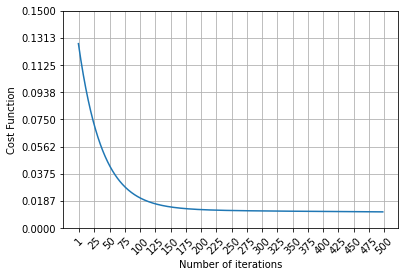

In [71]:
def plot_costs(costs):
    plt.plot(costs)
    plt.xlabel("Number of iterations")
    plt.ylabel('Cost Function')
    ticks = range(1, 525, 25)
    tick_labels = [str(tick - 1) if tick!=1 else str(tick) for tick in ticks]
    plt.xticks(ticks, tick_labels, rotation =45)
    plt.yticks(np.linspace(0,0.15, 9))
    plt.grid()
    
plot_costs(costs)

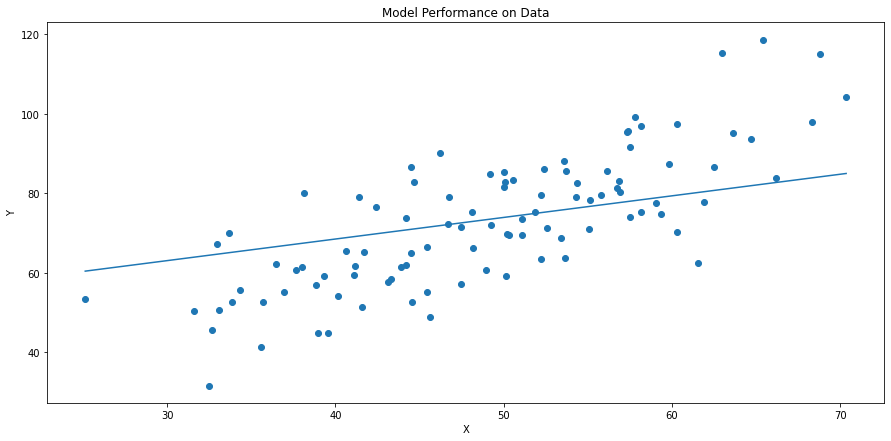

In [94]:
def plot_predicted_and_actual(X_mod, X_maxm, X_minm, X, Y, W, b):
    compute_X_scaled = np.linspace(np.amin(X_mod), np.amax(X_mod), 20)
    compute_X_scaled = compute_X_scaled.reshape(1, -1)
    compute_Y_scaled = forward_propagation(compute_X_scaled, W, b)
    compute_Y = (compute_Y_scaled * (Y_maxm - Y_minm)) + Y_minm
    compute_X = (compute_X_scaled * (X_maxm - X_minm)) + X_minm

    plt.figure(figsize = (15, 7))
    ax = plt.axes()
    ax.scatter(X, Y)
    ax.plot(compute_X.T, compute_Y.T)

    ax.set_xlabel('X');
    ax.set_ylabel('Y');
    ax.set_title('Model Performance on Data')
    plt.show()
    
plot_predicted_and_actual(X_mod, X_maxm, X_minm, X, Y, W, b)

<a id = 'scoring_points'></a>
## [5. Scoring Points Answers](#toc)

Q1) Explain what a cost function is.<br><br>
A1) The cost function is basically a metric to evaluate how the model predictions compare with the actual predictions for the given set of features. The objective is to bring this metric as close to zero as possible while ensuring that the model does not fall prey to overfitting.<br><br>

Q2) Understanding of Derivatives.<br><br>
A2) In order to minimize the cost function we differentiate it with respect to the trainable features we have - in this case it is the weights and biases. Differentiation with respect to the weights and biases gives us a direction and magnitude in which to head in order to optimize the value of the cost function.<br><br>

Q3) Effects of having different learning rates. <br><br>
A3) Learning rate is used to control the magnitude of gradient descent. A very high value of gradient descent may actually cause the model to diverge from the minimum while a very low value may cause it to converge too slowly. This can be easily demonstrated by the loss functions as is shown in the following section.

In [130]:
def plot_costs(costs, subplot, yticks = np.linspace(0,0.15, 5)):
    plt.subplot(subplot[0], subplot[1], subplot[2])
    plt.plot(costs);
    plt.xlabel("Number of iterations");
    plt.ylabel('Cost Function');
    ticks = range(1, 525, 75);
    tick_labels = [str(tick - 1) if tick!=1 else str(tick) for tick in ticks];
    plt.xticks(ticks, tick_labels, rotation =45);
    plt.yticks(yticks);
    plt.grid();
    plt.show();
    return

100%|█████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 20833.81it/s]


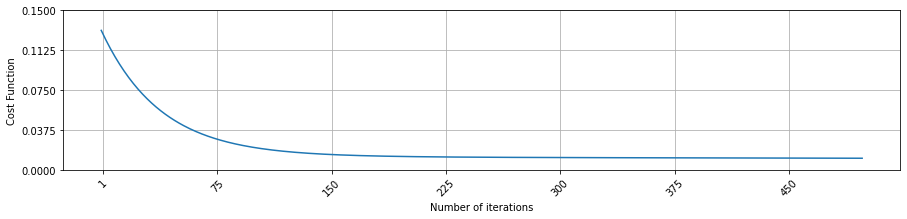

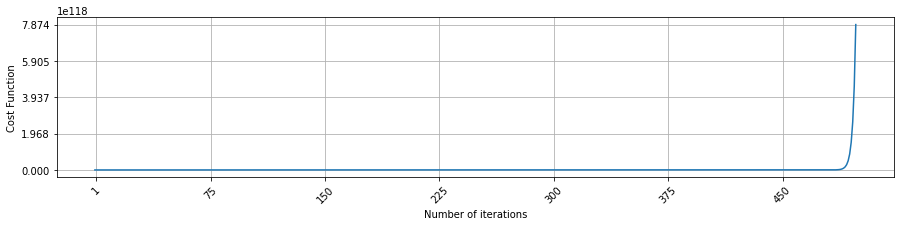

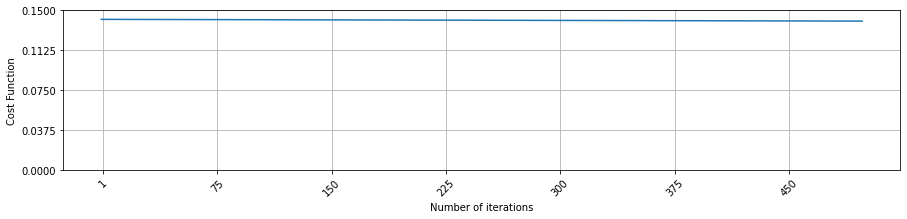

In [138]:
X_mod, Y_mod, X_maxm, X_minm,Y_maxm, Y_minm = preprocess_inputs(X, Y)
W, b = initialize_parameters(X.shape[0])
costs1, W, b = gradient_descent(X_mod, Y_mod, W, b, 0.01, 500)

X_mod, Y_mod, X_maxm, X_minm,Y_maxm, Y_minm = preprocess_inputs(X, Y)
W, b = initialize_parameters(X.shape[0])
costs2, W, b = gradient_descent(X_mod, Y_mod, W, b, 1.8, 500)

X_mod, Y_mod, X_maxm, X_minm,Y_maxm, Y_minm = preprocess_inputs(X, Y)
W, b = initialize_parameters(X.shape[0])
costs3, W, b = gradient_descent(X_mod, Y_mod, W, b, 1e-5, 500)

plt.figure(figsize = (15,10))
plot_costs(costs1, (3,1,1))

plt.figure(figsize = (15,10))
plot_costs(costs2, (3,1,2), np.linspace(np.amin(costs2), np.amax(costs2), 5))

plt.figure(figsize = (15,10))
plot_costs(costs3, (3,1,3))

As can be observed, an optimal value of learning rate causes it to settle in the minimum whereas a large value causes it to diverge and a small value causes it to descend too slowly